In [ ]:
pip install pandas tensorflow tensorflow_hub matplotlib

In [ ]:
pip install --upgrade tensorflow tensorflow-hub


In [2]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Paths
zip_path = 'df.zip'
extract_path = 'dog_emotion'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [38]:
# Define the base directory for the dataset containing subfolders for emotions
base_dir = 'finaldog/dogy'  # Path to 'Dog Emotion' folder

# Importing TensorFlow and necessary modules
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Use 20% of the data for validation
)

# Training data generator
train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Display detected classes
train_gen.class_indices

Found 92 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


{'angry': 0, 'happy': 1, 'releaxed': 2, 'sad': 3}

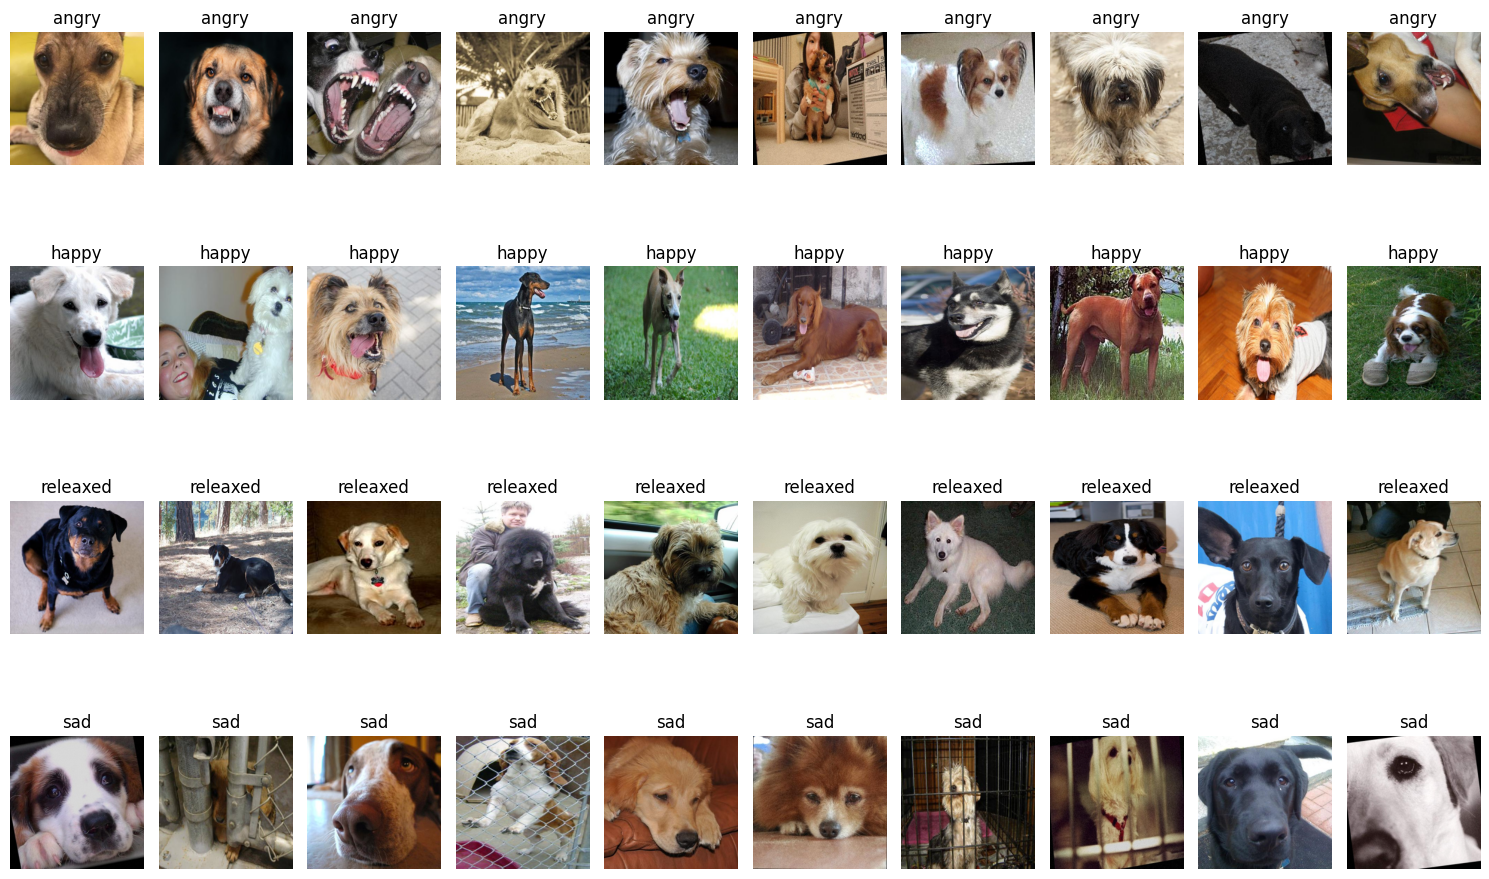

In [40]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to each class folder
dataset_path = 'finaldog/dogy/'  # Update to correct dataset path
class_folders = ['angry', 'happy', 'releaxed', 'sad']
base_dir = dataset_path  # Path containing class folders

# Show a few images from each class
num_images = 10  # Number of images to display per class

# Create a figure for displaying images
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_folders):
    class_dir = os.path.join(base_dir, class_name)
    image_files = os.listdir(class_dir)[:num_images]  # Take first 'num_images' files
    for j, image_file in enumerate(image_files):
        img_path = os.path.join(class_dir, image_file)
        img = Image.open(img_path).resize((224, 224))
        plt.subplot(len(class_folders), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

Number of images per class:
      Class  Count
0     angry     24
1     happy     24
2  releaxed     32
3       sad     32


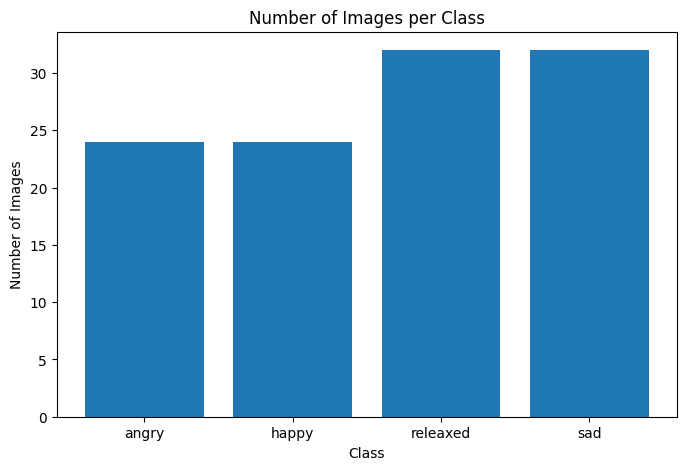


Sample Image Sizes:
   Width  Height
0    384     384
1    800     600
2    384     384
3    384     384
4    384     384


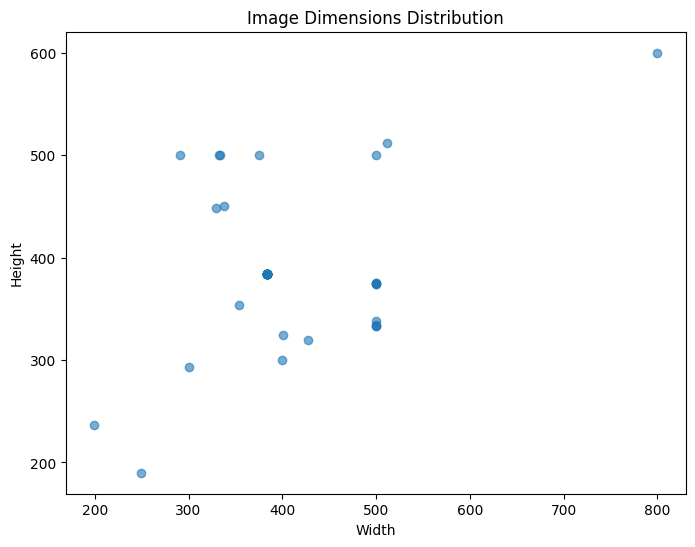

In [41]:
# Analyze the number of images in each class
class_counts = {}
for class_name in class_folders:
    class_dir = os.path.join(base_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_dir))

# Convert the analysis to a DataFrame for better visualization
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Display the number of images per class
print("Number of images per class:")
print(class_counts_df)

# Bar plot for image distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.show()

# Example image sizes across the dataset
image_sizes = []
for class_name in class_folders:
    class_dir = os.path.join(base_dir, class_name)
    for image_file in os.listdir(class_dir)[:10]:  # Analyze the first 10 images per class
        img_path = os.path.join(class_dir, image_file)
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")

# Analyze image size distribution
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
print("\nSample Image Sizes:")
print(image_sizes_df.head())

# Scatter plot of image dimensions
plt.figure(figsize=(8, 6))
plt.scatter(image_sizes_df['Width'], image_sizes_df['Height'], alpha=0.6)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimensions Distribution')
plt.show()

In [42]:
import tf_keras

In [43]:
# Load pre-trained models from TensorFlow Hub
mobilenet_v2_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

inception_v3_url = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

# Choose one of the models
feature_extractor_url = mobilenet_v2_url  # Change to inception_v3_url to use InceptionV3

# Load the feature extractor
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=(224, 224,3)
    #trainable=False  # Freeze the pre-trained model
)

# Build the model
model = tf_keras.Sequential([
    feature_extractor_layer,
    tf_keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
# Train the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Epoch 1/10
      4/Unknown - 33s 1s/step - loss: 1.5172 - accuracy: 0.2984

KeyboardInterrupt: 

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [ ]:
pip install --upgrade tensorflow tensorflow-hub


  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)


In [45]:

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2 #@param ["mobilenet_v2", "inception_v3"] {type:"raw"}

In [46]:
pip install tf_keras

In [47]:
import tf_keras

In [48]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])


In [49]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [50]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 112 files belonging to 4 classes.
Using 90 files for training.


In [51]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 112 files belonging to 4 classes.
Using 22 files for validation.


In [52]:
train_ds = train_dataset
val_ds = validation_dataset

In [53]:
import numpy as np

In [54]:
class_names = np.array(train_ds.class_names)
print(class_names)

['angry' 'happy' 'releaxed' 'sad']


In [55]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [56]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [57]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [58]:
result_batch = classifier.predict(train_ds)

3/3 [==============================] - 3s 884ms/step


In [59]:
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
predicted_class_names


NameError: name 'imagenet_labels' is not defined

In [76]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

feature_extractor_model = inception_v3 #@param ["mobilenet_v2", "inception_v3"] {type:"raw"}

In [77]:

feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [78]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [79]:
num_classes = len(class_names)

model = tf_keras.Sequential([
  feature_extractor_layer,
  tf_keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_4 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 21810980 (83.20 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [80]:
predictions = model(image_batch)

In [81]:
predictions.shape

TensorShape([32, 4])

In [82]:
import datetime

In [83]:
model.compile(
  optimizer=tf_keras.optimizers.Adam(),
  loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf_keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [84]:
NUM_EPOCHS = 10

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/10
3/3 [==============================] - 30s 9s/step - loss: 1.6374 - acc: 0.2889 - val_loss: 1.8526 - val_acc: 0.1818
Epoch 2/10
3/3 [==============================] - 22s 9s/step - loss: 1.2332 - acc: 0.4444 - val_loss: 1.6036 - val_acc: 0.3182
Epoch 3/10
3/3 [==============================] - 23s 10s/step - loss: 1.0354 - acc: 0.5667 - val_loss: 1.6531 - val_acc: 0.3182
Epoch 4/10
3/3 [==============================] - 22s 9s/step - loss: 0.8380 - acc: 0.7667 - val_loss: 1.7362 - val_acc: 0.2727
Epoch 5/10
3/3 [==============================] - 23s 10s/step - loss: 0.6952 - acc: 0.8222 - val_loss: 1.6621 - val_acc: 0.2727
Epoch 6/10
3/3 [==============================] - 21s 9s/step - loss: 0.5818 - acc: 0.8556 - val_loss: 1.6168 - val_acc: 0.2727
Epoch 7/10
3/3 [==============================] - 22s 9s/step - loss: 0.5041 - acc: 0.8889 - val_loss: 1.6533 - val_acc: 0.2727
Epoch 8/10
3/3 [==============================] - 22s 9s/step - loss: 0.4336 - acc: 0.9111 - val_loss:

In [86]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 3s 3s/step


TypeError: only integer scalar arrays can be converted to a scalar index

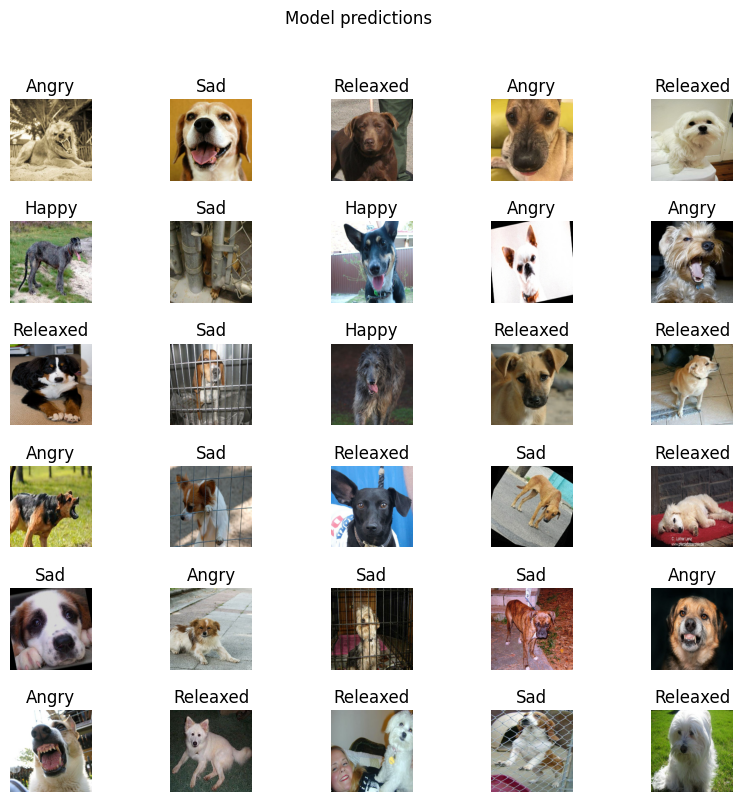

In [70]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

1/1 [==============================] - 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.96      1.00      0.98        23
       happy       1.00      0.84      0.91        19
     relaxed       0.93      0.96      0.95        27
         sad       0.95      1.00      0.98        21

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.95        90
weighted avg       0.96      0.96      0.95        90



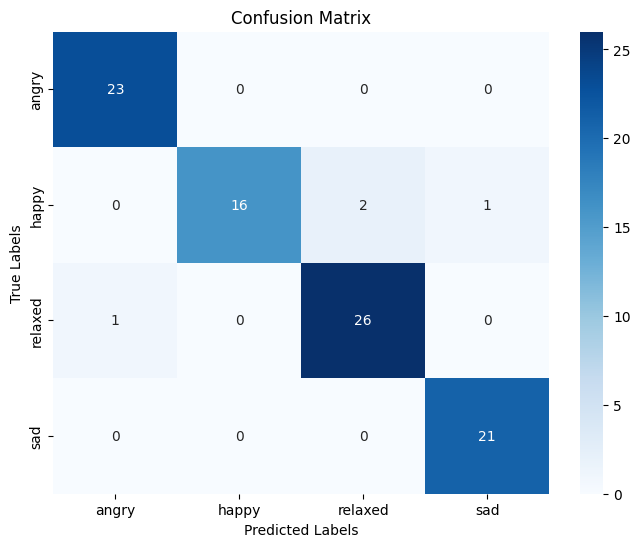

In [75]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_ds is the test dataset
# Extract true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test dataset to get predictions
for images, labels in train_ds:
    predictions = model.predict(images)  # Get predictions
    predicted_classes = np.argmax(predictions, axis=1)  # Convert logits to class indices
    true_labels.extend(labels.numpy())  # Append true labels
    predicted_labels.extend(predicted_classes)  # Append predicted labels

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
